In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
raw = pd.read_csv('wind_pecos_2.csv')

In [72]:
raw['date_format'] = pd.to_datetime(raw['time'], format='%Y-%m-%dT%H:%M:%SZ').dt.date
raw['time_format'] = pd.to_datetime(raw['time'], format='%Y-%m-%dT%H:%M:%SZ').dt.time
raw['month_format'] = pd.to_datetime(raw['time'], format='%Y-%m-%dT%H:%M:%SZ').dt.month
raw['year_format'] = pd.to_datetime(raw['time'], format='%Y-%m-%dT%H:%M:%SZ').dt.year

In [73]:
raw['station'] = 0

In [74]:
raw[(raw['time']=='2024-03-18T00:00:00Z')]

,time,altitude,latitude,longitude,wind_we,wind_ns,date_format,time_format,month_format,year_format,station
48168,2024-03-18T00:00:00Z,10,30.499992,256.5,-4.400000,-1.699999,2024-03-18,00:00:00,3,2024,0
48169,2024-03-18T00:00:00Z,10,30.499992,257.0,-2.900000,-1.599999,2024-03-18,00:00:00,3,2024,0
48170,2024-03-18T00:00:00Z,10,30.499992,257.5,-2.799999,-1.299999,2024-03-18,00:00:00,3,2024,0
48171,2024-03-18T00:00:00Z,10,30.999992,256.5,-3.500000,-0.599998,2024-03-18,00:00:00,3,2024,0
48172,2024-03-18T00:00:00Z,10,30.999992,257.0,-2.100000,-1.099999,2024-03-18,00:00:00,3,2024,0
48173,2024-03-18T00:00:00Z,10,30.999992,257.5,-1.799999,-0.900000,2024-03-18,00:00:00,3,2024,0
48174,2024-03-18T00:00:00Z,10,31.499992,256.5,-3.600000,0.700001,2024-03-18,00:00:00,3,2024,0
48175,2024-03-18T00:00:00Z,10,31.499992,257.0,-2.400000,0.000002,2024-03-18,00:00:00,3,2024,0
48176,2024-03-18T00:00:00Z,10,31.499992,257.5,-3.400000,-1.400000,2024-03-18,00:00:00,3,2024,0


In [75]:
raw.loc[(raw['latitude']<30.5)&(raw['longitude']==256.5), 'station'] = 0
raw.loc[(raw['latitude']<30.5)&(raw['longitude']==257.0), 'station'] = 1
raw.loc[(raw['latitude']<30.5)&(raw['longitude']==257.5), 'station'] = 2
raw.loc[(raw['latitude']>30.5)&(raw['latitude']<31.0)&(raw['longitude']==256.5), 'station'] = 3
raw.loc[(raw['latitude']>30.5)&(raw['latitude']<31.0)&(raw['longitude']==257.0), 'station'] = 4
raw.loc[(raw['latitude']>30.5)&(raw['latitude']<31.0)&(raw['longitude']==257.5), 'station'] = 5
raw.loc[(raw['latitude']>31.4)&(raw['longitude']==256.5), 'station'] = 6
raw.loc[(raw['latitude']>31.4)&(raw['longitude']==257.0), 'station'] = 7
raw.loc[(raw['latitude']>31.4)&(raw['longitude']==257.5), 'station'] = 8

In [76]:
raw.head()

,time,altitude,latitude,longitude,wind_we,wind_ns,date_format,time_format,month_format,year_format,station
0,2020-04-01T00:00:00Z,10,30.499992,256.5,-1.799999,2.500002,2020-04-01,00:00:00,4,2020,0
1,2020-04-01T00:00:00Z,10,30.499992,257.0,-1.799999,1.800001,2020-04-01,00:00:00,4,2020,1
2,2020-04-01T00:00:00Z,10,30.499992,257.5,-2.199999,2.200001,2020-04-01,00:00:00,4,2020,2
3,2020-04-01T00:00:00Z,10,30.999992,256.5,-2.599998,-0.400000,2020-04-01,00:00:00,4,2020,3
4,2020-04-01T00:00:00Z,10,30.999992,257.0,-1.199999,0.100000,2020-04-01,00:00:00,4,2020,4


In [77]:
raw['date_string']= raw['time'].str[0:10]

In [78]:
raw.head()

,time,altitude,latitude,longitude,wind_we,wind_ns,date_format,time_format,month_format,year_format,station,date_string
0,2020-04-01T00:00:00Z,10,30.499992,256.5,-1.799999,2.500002,2020-04-01,00:00:00,4,2020,0,2020-04-01
1,2020-04-01T00:00:00Z,10,30.499992,257.0,-1.799999,1.800001,2020-04-01,00:00:00,4,2020,1,2020-04-01
2,2020-04-01T00:00:00Z,10,30.499992,257.5,-2.199999,2.200001,2020-04-01,00:00:00,4,2020,2,2020-04-01
3,2020-04-01T00:00:00Z,10,30.999992,256.5,-2.599998,-0.400000,2020-04-01,00:00:00,4,2020,3,2020-04-01
4,2020-04-01T00:00:00Z,10,30.999992,257.0,-1.199999,0.100000,2020-04-01,00:00:00,4,2020,4,2020-04-01


`wind_we_ms` describes the wind in eastward direction in meter per second. The positive number means west wind (to the east) and the negative number means east wind (to the west).

`wind_ns_ms` describes the wind in northward direction in meter per second. The positive number means south wind (to the north) and the negative number means north wind (to the south).

In [119]:
raw[(raw['date_string']=='2024-03-17') & (raw['station']==6)]

,time,altitude,latitude,longitude,wind_we,wind_ns,date_format,time_format,month_format,year_format,station,date_string,direction
48138,2024-03-17T00:00:00Z,10,31.499992,256.5,-2.199999,-0.700001,2024-03-17,00:00:00,3,2024,6,2024-03-17,ne
48147,2024-03-17T06:00:00Z,10,31.499992,256.5,-1.500000,-2.400000,2024-03-17,06:00:00,3,2024,6,2024-03-17,ne
48156,2024-03-17T12:00:00Z,10,31.499992,256.5,-1.400000,-3.199999,2024-03-17,12:00:00,3,2024,6,2024-03-17,ne
48165,2024-03-17T18:00:00Z,10,31.499992,256.5,-2.099998,-2.499998,2024-03-17,18:00:00,3,2024,6,2024-03-17,ne


In [80]:
raw.describe()

,altitude,latitude,longitude,wind_we,wind_ns,month_format,year_format,station
count,48204.0,48204.000000,48204.000000,48159.000000,48159.000000,48204.000000,48204.000000,48204.000000
mean,10.0,30.999992,257.000000,-0.666205,0.973023,6.605489,2021.728155,4.000000
std,0.0,0.408253,0.408253,2.319570,2.243420,3.467192,1.199200,2.582016
min,10.0,30.499992,256.500000,-9.600000,-12.000000,1.000000,2020.000000,0.000000
25%,10.0,30.499992,256.500000,-2.299999,-0.400000,4.000000,2021.000000,2.000000
50%,10.0,30.999992,257.000000,-0.900000,1.200001,7.000000,2022.000000,4.000000
75%,10.0,31.499992,257.500000,0.700001,2.500000,10.000000,2023.000000,6.000000
max,10.0,31.499992,257.500000,11.700003,9.800001,12.000000,2024.000000,8.000000


In [81]:
raw['direction'] = 'na'

In [82]:
# if the wind is less than 0.3 m/s (around 1km per hour), will treat as no wind from that direction 

# `wind_we_ms` describes the wind in eastward direction in meter per second. 
# The positive number means west wind (to the east) and the negative number means east wind (to the west).

# `wind_ns_ms` describes the wind in northward direction in meter per second. 
# The positive number means south wind (to the north) and the negative number means north wind (to the south).

raw.loc[(raw['wind_ns'] <= -0.3)&(raw['wind_we'] <= -0.3), 'direction'] = 'ne' 
raw.loc[(raw['wind_ns'] <= -0.3)&(raw['wind_we'] >= 0.3), 'direction'] = 'nw'

raw.loc[(raw['wind_ns'] >= 0.3)&(raw['wind_we'] <= -0.3), 'direction'] = 'se'
raw.loc[(raw['wind_ns'] >= 0.3)&(raw['wind_we'] >= 0.3), 'direction'] = 'sw'

# when ns wind is small - decide whether it's e or w
raw.loc[(raw['wind_ns']> -0.3) & (raw['wind_ns'] < 0.3) & (raw['wind_we'] <= -0.3), 'direction'] = 'e'
raw.loc[(raw['wind_ns']> -0.3) & (raw['wind_ns'] < 0.3) & (raw['wind_we'] >= 0.3), 'direction'] = 'w'

# when we wind is small - decide whether it's n or s
raw.loc[(raw['wind_we']> -0.3) & (raw['wind_we'] < 0.3) & (raw['wind_ns'] <= -0.3), 'direction'] = 'n'
raw.loc[(raw['wind_we']> -0.3) & (raw['wind_we'] < 0.3) & (raw['wind_ns'] >= 0.3), 'direction'] = 's'

# when all winds are small - no wind
raw.loc[(raw['wind_we']> -0.3) & (raw['wind_we'] < 0.3) & (raw['wind_ns'] > -0.3) & (raw['wind_ns'] < 0.3), 'direction'] = 'NA'

In [83]:
raw.head()

,time,altitude,latitude,longitude,wind_we,wind_ns,date_format,time_format,month_format,year_format,station,date_string,direction
0,2020-04-01T00:00:00Z,10,30.499992,256.5,-1.799999,2.500002,2020-04-01,00:00:00,4,2020,0,2020-04-01,se
1,2020-04-01T00:00:00Z,10,30.499992,257.0,-1.799999,1.800001,2020-04-01,00:00:00,4,2020,1,2020-04-01,se
2,2020-04-01T00:00:00Z,10,30.499992,257.5,-2.199999,2.200001,2020-04-01,00:00:00,4,2020,2,2020-04-01,se
3,2020-04-01T00:00:00Z,10,30.999992,256.5,-2.599998,-0.400000,2020-04-01,00:00:00,4,2020,3,2020-04-01,ne
4,2020-04-01T00:00:00Z,10,30.999992,257.0,-1.199999,0.100000,2020-04-01,00:00:00,4,2020,4,2020-04-01,e


In [130]:
raw['abs_we_speed'] = abs(raw['wind_we'])
raw['abs_ns_speed'] = abs(raw['wind_ns'])

In [131]:
raw.head()

,time,altitude,latitude,longitude,wind_we,wind_ns,date_format,time_format,month_format,year_format,station,date_string,direction,abs_we_speed,abs_ns_speed
0,2020-04-01T00:00:00Z,10,30.499992,256.5,-1.799999,2.500002,2020-04-01,00:00:00,4,2020,0,2020-04-01,se,1.799999,2.500002
1,2020-04-01T00:00:00Z,10,30.499992,257.0,-1.799999,1.800001,2020-04-01,00:00:00,4,2020,1,2020-04-01,se,1.799999,1.800001
2,2020-04-01T00:00:00Z,10,30.499992,257.5,-2.199999,2.200001,2020-04-01,00:00:00,4,2020,2,2020-04-01,se,2.199999,2.200001
3,2020-04-01T00:00:00Z,10,30.999992,256.5,-2.599998,-0.400000,2020-04-01,00:00:00,4,2020,3,2020-04-01,ne,2.599998,0.400000
4,2020-04-01T00:00:00Z,10,30.999992,257.0,-1.199999,0.100000,2020-04-01,00:00:00,4,2020,4,2020-04-01,e,1.199999,0.100000


In [95]:
count_direction = raw.groupby(['year_format', 'direction']).size().unstack(level=1)

<Axes: title={'center': 'Distribution of wind directions from 2020 to 2024'}, xlabel='year_format'>

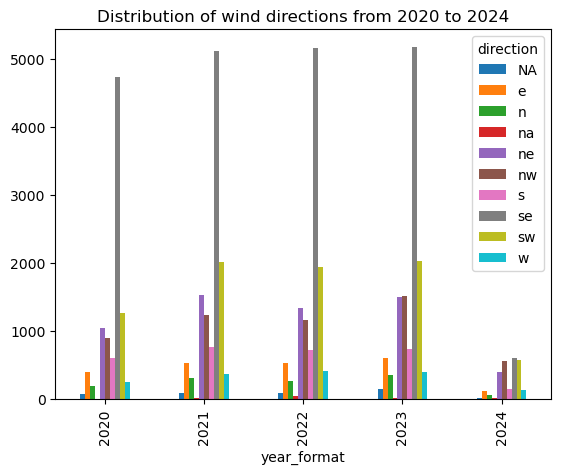

In [221]:
count_direction.plot(kind='bar', title='Distribution of wind directions from 2020 to 2024')

In [222]:
# 'na' is when one of the wind speed is missing, will ignore for now as only 90 records are na
raw.count()

time            48204
altitude        48204
latitude        48204
longitude       48204
wind_we         48159
wind_ns         48159
date_format     48204
time_format     48204
month_format    48204
year_format     48204
station         48204
date_string     48204
direction       48204
abs_we_speed    48159
abs_ns_speed    48159
abs_speed       48204
dtype: int64

In [102]:
count_direction

direction,NA,e,n,na,ne,nw,s,se,sw,w
year_format,,,,,,,,,,
2020,69.0,404.0,191.0,NaN,1050.0,893.0,599.0,4734.0,1264.0,255.0
2021,91.0,533.0,310.0,18.0,1523.0,1229.0,762.0,5113.0,2010.0,372.0
2022,90.0,527.0,272.0,45.0,1344.0,1161.0,725.0,5151.0,1940.0,409.0
2023,141.0,606.0,357.0,18.0,1494.0,1516.0,742.0,5170.0,2025.0,396.0
2024,23.0,126.0,64.0,9.0,398.0,563.0,154.0,600.0,579.0,139.0


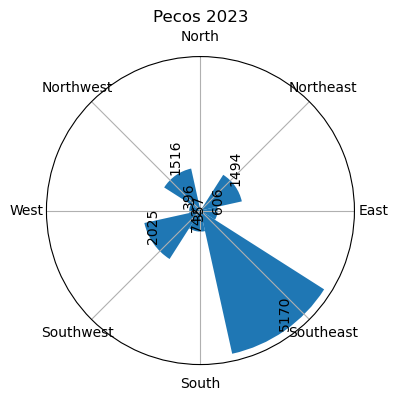

In [186]:
# if i am just doing 2023 - 
# Define wind direction categories, angle ranges, and counts
directions = ['North', 'Northeast', 'East', 'Southeast', 'South', 'Southwest', 'West', 'Northwest']
angle_ranges = [(347.5, 32.5), (32.5, 77.5), (77.5, 122.5), (122.5, 167.5),
                (167.5, 212.5), (212.5, 257.5), (257.5, 302.5), (302.5, 347.5)]
counts = [357, 1494, 606, 5170, 742, 2025, 396, 1516]
counts_2022 = [272,1344,527,5151,725,1940,409,1161]
counts_2021 = [310, 1523, 533, 5113, 762, 2010, 372, 1229]

# Calculate midpoints of angle ranges
midpoints = [(start + end) / 2 for start, end in angle_ranges]

# Set up polar plot
plt.figure(figsize=(4, 4))
ax = plt.subplot(111, polar=True)

# Plot bars for each direction
bars = ax.bar(np.radians(midpoints), counts, width=np.radians(45), bottom=0.0)

# Set angle zero direction to North (10 degrees offset)
ax.set_theta_offset(np.radians(10))

# Set counter-clockwise direction (45 degrees offset)
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')

# Hide radial ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])

# Set angle ticks and labels
ax.set_xticks(np.radians([0, 45, 90, 135, 180, 225, 270, 315]))
ax.set_xticklabels(['North', 'Northeast', 'East', 'Southeast', 'South', 'Southwest', 'West', 'Northwest'])

# Add count values on top of bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    
    ax.text(bar.get_x() + bar.get_width() / 2, height + 5, count, ha='center', va='bottom', rotation='vertical')

# Add title and show plot
plt.title('Pecos 2023')
plt.show()

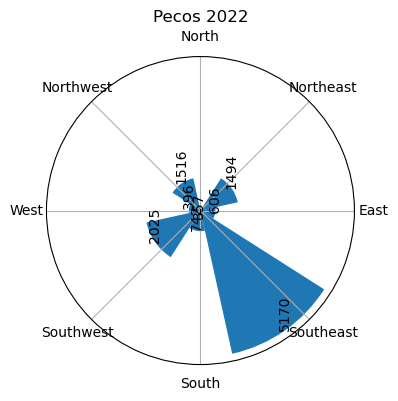

In [184]:
# 2022
# Define wind direction categories, angle ranges, and counts
directions = ['North', 'Northeast', 'East', 'Southeast', 'South', 'Southwest', 'West', 'Northwest']
angle_ranges = [(347.5, 32.5), (32.5, 77.5), (77.5, 122.5), (122.5, 167.5),
                (167.5, 212.5), (212.5, 257.5), (257.5, 302.5), (302.5, 347.5)]
# counts = [357, 1494, 606, 5170, 742, 2025, 396, 1516]
counts_2022 = [272,1344,527,5151,725,1940,409,1161]
counts_2021 = [310, 1523, 533, 5113, 762, 2010, 372, 1229]

# Calculate midpoints of angle ranges
midpoints = [(start + end) / 2 for start, end in angle_ranges]

# Set up polar plot
plt.figure(figsize=(4, 4))
ax = plt.subplot(111, polar=True)

# Plot bars for each direction
bars = ax.bar(np.radians(midpoints), counts_2022, width=np.radians(45), bottom=0.0)

# Set angle zero direction to North (10 degrees offset)
ax.set_theta_offset(np.radians(10))

# Set counter-clockwise direction (45 degrees offset)
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')

# Hide radial ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])

# Set angle ticks and labels
ax.set_xticks(np.radians([0, 45, 90, 135, 180, 225, 270, 315]))
ax.set_xticklabels(['North', 'Northeast', 'East', 'Southeast', 'South', 'Southwest', 'West', 'Northwest'])

# Add count values on top of bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    
    ax.text(bar.get_x() + bar.get_width() / 2, height + 5, count, ha='center', va='bottom', rotation='vertical')

# Add title and show plot
plt.title('Pecos 2022')
plt.show()

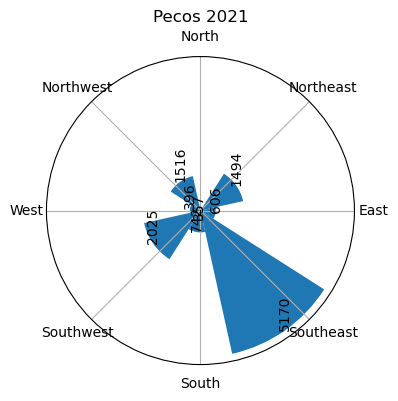

In [185]:
# 2021
# Define wind direction categories, angle ranges, and counts
directions = ['North', 'Northeast', 'East', 'Southeast', 'South', 'Southwest', 'West', 'Northwest']
angle_ranges = [(347.5, 32.5), (32.5, 77.5), (77.5, 122.5), (122.5, 167.5),
                (167.5, 212.5), (212.5, 257.5), (257.5, 302.5), (302.5, 347.5)]
# counts = [357, 1494, 606, 5170, 742, 2025, 396, 1516]
# counts_2022 = [272,1344,527,5151,725,1940,409,1161]
counts_2021 = [310, 1523, 533, 5113, 762, 2010, 372, 1229]

# Calculate midpoints of angle ranges
midpoints = [(start + end) / 2 for start, end in angle_ranges]

# Set up polar plot
plt.figure(figsize=(4, 4))
ax = plt.subplot(111, polar=True)

# Plot bars for each direction
bars = ax.bar(np.radians(midpoints), counts_2021, width=np.radians(45), bottom=0.0)

# Set angle zero direction to North (10 degrees offset)
ax.set_theta_offset(np.radians(10))

# Set counter-clockwise direction (45 degrees offset)
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')

# Hide radial ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])

# Set angle ticks and labels
ax.set_xticks(np.radians([0, 45, 90, 135, 180, 225, 270, 315]))
ax.set_xticklabels(['North', 'Northeast', 'East', 'Southeast', 'South', 'Southwest', 'West', 'Northwest'])

# Add count values on top of bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    
    ax.text(bar.get_x() + bar.get_width() / 2, height + 5, count, ha='center', va='bottom', rotation='vertical')

# Add title and show plot
plt.title('Pecos 2021')
plt.show()

In [106]:
count_direction_m = raw.groupby(['month_format', 'direction']).size().unstack(level=1)

In [107]:
count_direction_m

direction,NA,e,n,na,ne,nw,s,se,sw,w
month_format,,,,,,,,,,
1,48.0,176.0,146.0,9.0,484.0,880.0,254.0,1057.0,1012.0,236.0
2,42.0,146.0,123.0,NaN,526.0,691.0,275.0,974.0,832.0,189.0
3,16.0,124.0,84.0,27.0,455.0,502.0,199.0,1126.0,642.0,119.0
4,23.0,164.0,81.0,9.0,698.0,574.0,170.0,1409.0,634.0,117.0
5,35.0,177.0,77.0,9.0,510.0,346.0,223.0,1919.0,628.0,108.0
6,28.0,164.0,71.0,18.0,362.0,248.0,219.0,2256.0,430.0,92.0
7,31.0,223.0,43.0,9.0,287.0,72.0,220.0,2960.0,270.0,34.0
8,43.0,228.0,73.0,NaN,460.0,166.0,236.0,2624.0,317.0,65.0
9,31.0,264.0,124.0,NaN,575.0,202.0,239.0,2219.0,411.0,66.0


<Axes: title={'center': 'Distribution of wind direction by month'}, xlabel='month_format'>

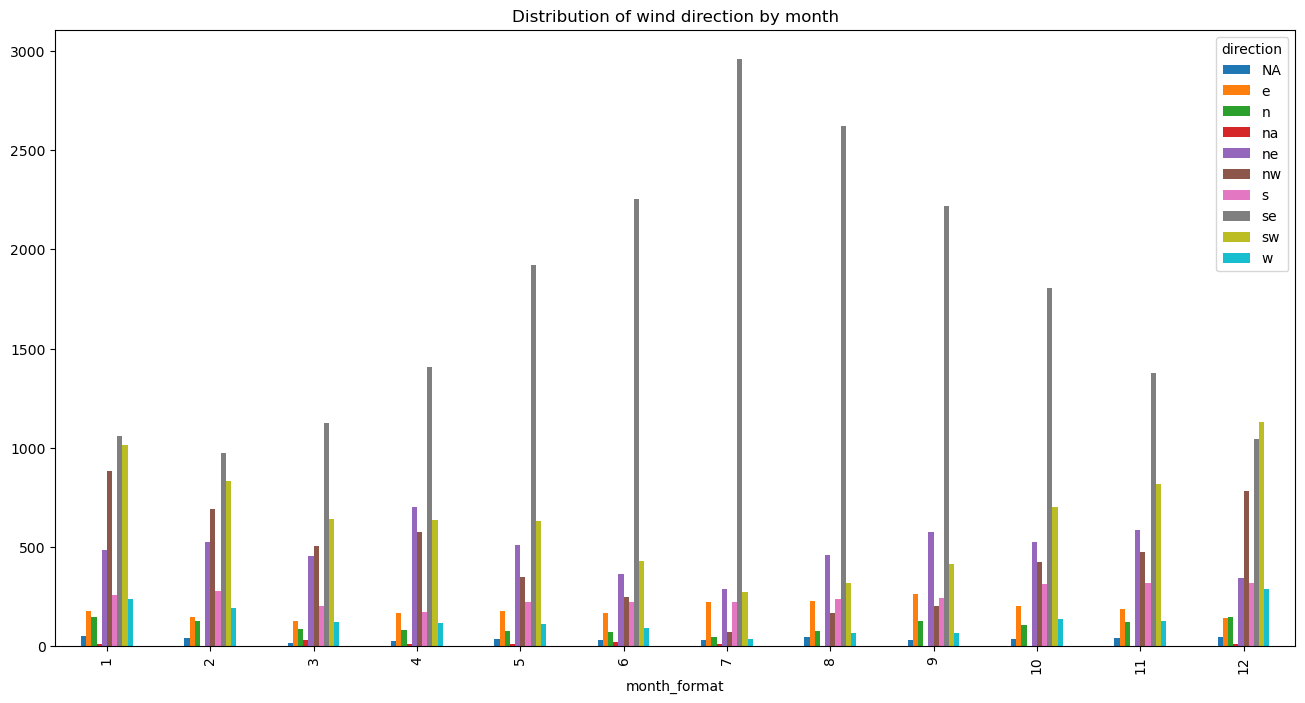

In [223]:
count_direction_m.plot(kind='bar',figsize=(16, 8), title='Distribution of wind direction by month')


In [133]:
raw.groupby(['direction']).agg({'abs_we_speed':['mean','min','max'],'abs_ns_speed':['mean','min','max']})

abs_we_speed                      abs_ns_speed                     
                  mean       min        max         mean       min        max
direction                                                                    
NA            0.154589  0.000000   0.299999     0.153382  0.000000   0.299999
e             2.014344  0.300001   7.900000     0.154645  0.000000   0.299999
n             0.157789  0.000000   0.299999     1.926633  0.300001   8.299999
na            3.993334  0.199999  10.800003     2.026667  0.000000   5.100000
ne            2.082888  0.300000   9.600000     1.874694  0.300001  12.000000
nw            2.405465  0.300001  11.200003     2.090153  0.300001  12.000000
s             0.155868  0.000000   0.299999     2.027801  0.300001   8.200001
se            2.208681  0.300001   8.000000     2.434443  0.300000   9.800001
sw            1.814697  0.300001  11.700003     1.869366  0.300001   7.300001
w             2.137365  0.300001  10.500002     0.156524  0.000000   0.299999

In [226]:
raw.groupby(['direction']).agg({'abs_speed':['mean','median','min','max']})

abs_speed                               
               mean    median       min        max
direction                                         
NA         0.210628  0.200001  0.000000   0.299999
e          2.014344  1.799999  0.300001   7.900000
n          1.926633  1.500000  0.300001   8.299999
na         3.010000  3.050000  0.000000  10.800003
ne         2.691960  2.499996  0.300001  12.000000
nw         3.102965  2.799999  0.400000  12.000000
s          2.027801  1.800003  0.300001   8.200001
se         2.957401  2.900000  0.300001   9.800001
sw         2.556396  2.300001  0.300001  11.700003
w          2.137365  1.700001  0.300001  10.500002

In [134]:
raw.groupby(['direction'])[['abs_we_speed','abs_ns_speed']].min()

,abs_we_speed,abs_ns_speed
direction,,
NA,0.000000,0.000000
e,0.300001,0.000000
n,0.000000,0.300001
na,0.199999,0.000000
ne,0.300000,0.300001
nw,0.300001,0.300001
s,0.000000,0.300001
se,0.300001,0.300000
sw,0.300001,0.300001


In [135]:
raw.groupby(['direction'])[['abs_we_speed','abs_ns_speed']].max()

,abs_we_speed,abs_ns_speed
direction,,
NA,0.299999,0.299999
e,7.900000,0.299999
n,0.299999,8.299999
na,10.800003,5.100000
ne,9.600000,12.000000
nw,11.200003,12.000000
s,0.299999,8.200001
se,8.000000,9.800001
sw,11.700003,7.300001


In [140]:
raw.groupby(['month_format'])[['abs_we_speed','abs_ns_speed']].max()

,abs_we_speed,abs_ns_speed
month_format,,
1,11.100002,9.500000
2,11.099998,9.000002
3,11.700003,8.600000
4,9.900002,9.800001
5,10.299999,9.699999
6,9.300001,8.500000
7,6.400000,6.400000
8,6.300001,6.200001
9,7.100000,12.000000


In [190]:
raw['abs_speed'] = raw[['abs_we_speed', 'abs_ns_speed']].max(axis=1)
raw.head()

,time,altitude,latitude,longitude,wind_we,wind_ns,date_format,time_format,month_format,year_format,station,date_string,direction,abs_we_speed,abs_ns_speed,abs_speed
0,2020-04-01T00:00:00Z,10,30.499992,256.5,-1.799999,2.500002,2020-04-01,00:00:00,4,2020,0,2020-04-01,se,1.799999,2.500002,2.500002
1,2020-04-01T00:00:00Z,10,30.499992,257.0,-1.799999,1.800001,2020-04-01,00:00:00,4,2020,1,2020-04-01,se,1.799999,1.800001,1.800001
2,2020-04-01T00:00:00Z,10,30.499992,257.5,-2.199999,2.200001,2020-04-01,00:00:00,4,2020,2,2020-04-01,se,2.199999,2.200001,2.200001
3,2020-04-01T00:00:00Z,10,30.999992,256.5,-2.599998,-0.400000,2020-04-01,00:00:00,4,2020,3,2020-04-01,ne,2.599998,0.400000,2.599998
4,2020-04-01T00:00:00Z,10,30.999992,257.0,-1.199999,0.100000,2020-04-01,00:00:00,4,2020,4,2020-04-01,e,1.199999,0.100000,1.199999


In [191]:
raw_2020 = raw[raw['year_format']==2020]
raw_2021 = raw[raw['year_format']==2021]
raw_2022 = raw[raw['year_format']==2022]
raw_2023 = raw[raw['year_format']==2023]
raw_2024 = raw[raw['year_format']==2024]

In [192]:
raw_2020

,time,altitude,latitude,longitude,wind_we,wind_ns,date_format,time_format,month_format,year_format,station,date_string,direction,abs_we_speed,abs_ns_speed,abs_speed
0,2020-04-01T00:00:00Z,10,30.499992,256.5,-1.799999,2.500002,2020-04-01,00:00:00,4,2020,0,2020-04-01,se,1.799999,2.500002,2.500002
1,2020-04-01T00:00:00Z,10,30.499992,257.0,-1.799999,1.800001,2020-04-01,00:00:00,4,2020,1,2020-04-01,se,1.799999,1.800001,1.800001
2,2020-04-01T00:00:00Z,10,30.499992,257.5,-2.199999,2.200001,2020-04-01,00:00:00,4,2020,2,2020-04-01,se,2.199999,2.200001,2.200001
3,2020-04-01T00:00:00Z,10,30.999992,256.5,-2.599998,-0.400000,2020-04-01,00:00:00,4,2020,3,2020-04-01,ne,2.599998,0.400000,2.599998
4,2020-04-01T00:00:00Z,10,30.999992,257.0,-1.199999,0.100000,2020-04-01,00:00:00,4,2020,4,2020-04-01,e,1.199999,0.100000,1.199999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,2020-12-30T18:00:00Z,10,30.999992,257.0,1.200001,-4.799999,2020-12-30,18:00:00,12,2020,4,2020-12-30,nw,1.200001,4.799999,4.799999
9455,2020-12-30T18:00:00Z,10,30.999992,257.5,-0.199999,-5.500000,2020-12-30,18:00:00,12,2020,5,2020-12-30,n,0.199999,5.500000,5.500000
9456,2020-12-30T18:00:00Z,10,31.499992,256.5,0.700001,-4.500000,2020-12-30,18:00:00,12,2020,6,2020-12-30,nw,0.700001,4.500000,4.500000
9457,2020-12-30T18:00:00Z,10,31.499992,257.0,0.200001,-4.199999,2020-12-30,18:00:00,12,2020,7,2020-12-30,n,0.200001,4.199999,4.199999


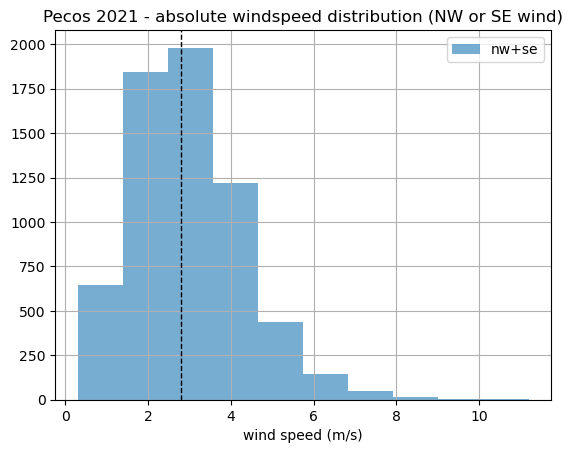

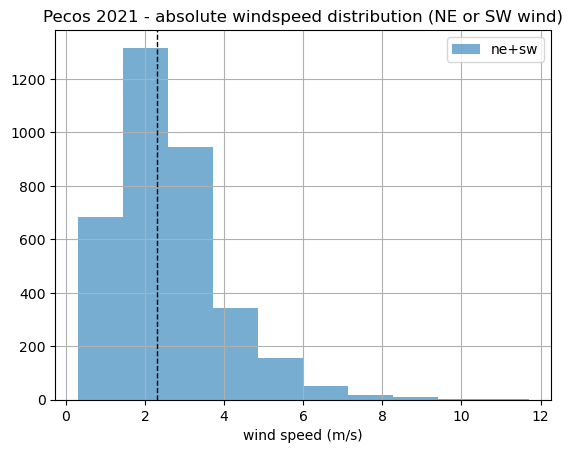

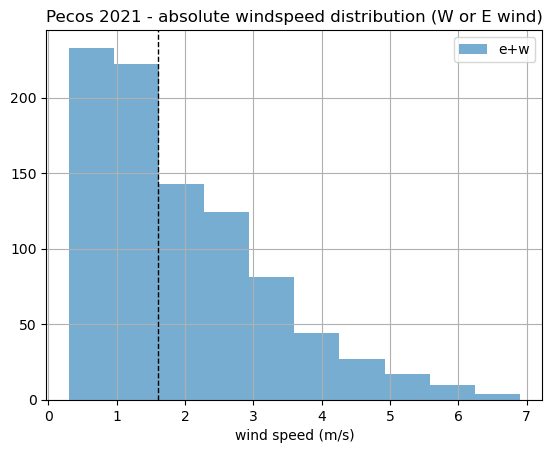

Text(0.5, 0, 'wind speed (m/s)')

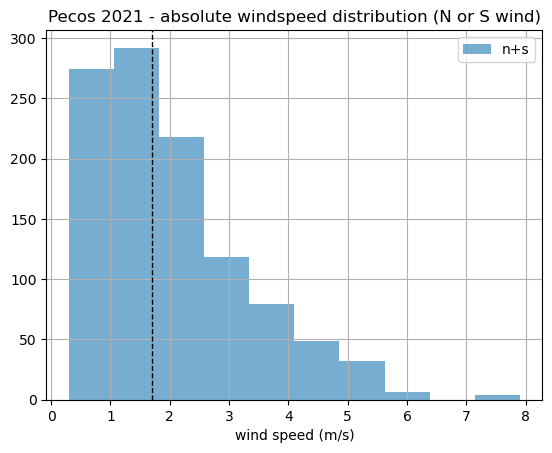

In [230]:
# raw_2020[(raw_2020['direction']=='se') | (raw_2020['direction']=='nw')].groupby('direction')['abs_we_speed'].hist(alpha=0.6)
raw_2021[(raw_2021['direction']=='se') | (raw_2021['direction']=='nw')]['abs_speed'].hist(alpha=0.6)

plt.legend(['nw+se'])
plt.axvline(raw_2021[(raw_2021['direction']=='se') | (raw_2021['direction']=='nw')]['abs_speed'].median(), color='k', linestyle='dashed', linewidth=1)
plt.title('Pecos 2021 - absolute windspeed distribution (NW or SE wind)')
plt.xlabel('wind speed (m/s)')
plt.show()

# raw_2020[(raw_2020['direction']=='sw') | (raw_2020['direction']=='ne')].groupby('direction')['abs_we_speed'].hist(alpha=0.6)
raw_2021[(raw_2021['direction']=='sw') | (raw_2021['direction']=='ne')]['abs_speed'].hist(alpha=0.6)
plt.legend(['ne+sw'])
plt.axvline(raw_2021[(raw_2021['direction']=='sw') | (raw_2021['direction']=='ne')]['abs_speed'].median(), color='k', linestyle='dashed', linewidth=1)
plt.title('Pecos 2021 - absolute windspeed distribution (NE or SW wind)')
plt.xlabel('wind speed (m/s)')
plt.show()

# repeat for E+W
# raw_2020[(raw_2020['direction']=='se') | (raw_2020['direction']=='nw')].groupby('direction')['abs_we_speed'].hist(alpha=0.6)
raw_2021[(raw_2021['direction']=='e') | (raw_2021['direction']=='w')]['abs_speed'].hist(alpha=0.6)
plt.legend(['e+w'])
plt.axvline(raw_2021[(raw_2021['direction']=='e') | (raw_2021['direction']=='w')]['abs_speed'].median(), color='k', linestyle='dashed', linewidth=1)
plt.title('Pecos 2021 - absolute windspeed distribution (W or E wind)')
plt.xlabel('wind speed (m/s)')
plt.show()

# repeat for S+N
# raw_2020[(raw_2020['direction']=='se') | (raw_2020['direction']=='nw')].groupby('direction')['abs_we_speed'].hist(alpha=0.6)
raw_2021[(raw_2021['direction']=='s') | (raw_2021['direction']=='n')]['abs_speed'].hist(alpha=0.6)
plt.legend(['n+s'])
plt.axvline(raw_2021[(raw_2021['direction']=='s') | (raw_2021['direction']=='n')]['abs_speed'].median(), color='k', linestyle='dashed', linewidth=1)
plt.title('Pecos 2021 - absolute windspeed distribution (N or S wind)')
plt.xlabel('wind speed (m/s)')

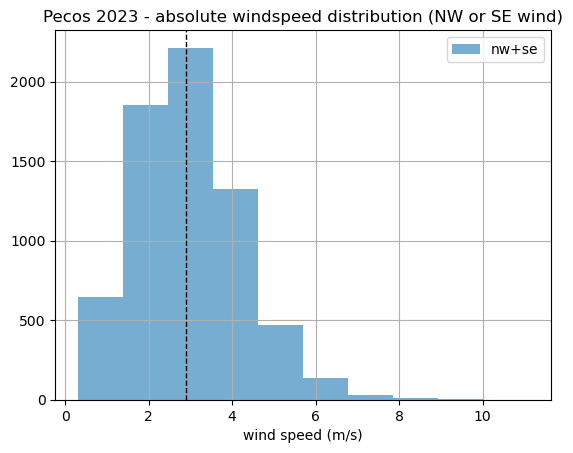

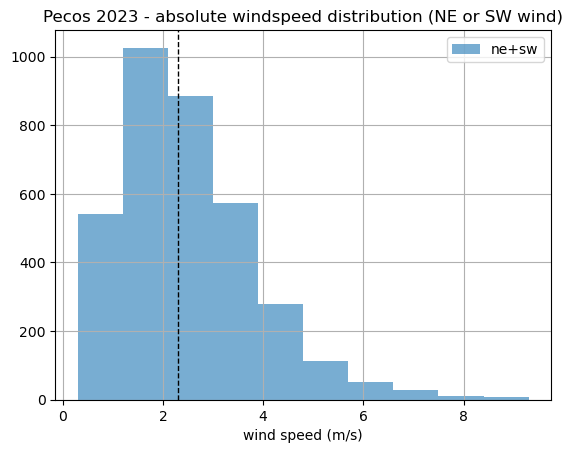

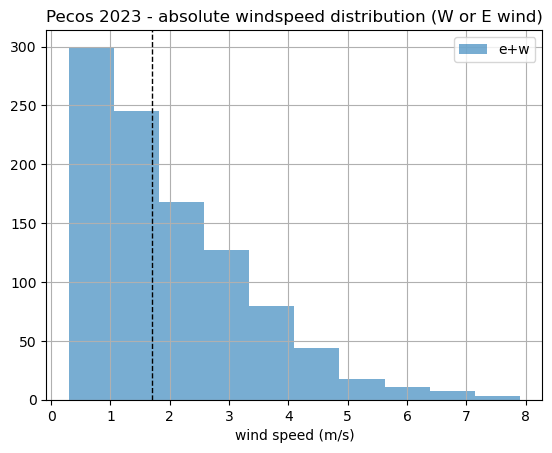

Text(0.5, 0, 'wind speed (m/s)')

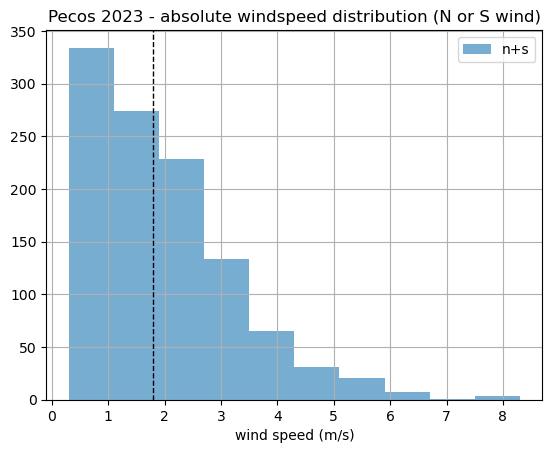

In [231]:
# repeat for 2023

raw_2023[(raw_2023['direction']=='se') | (raw_2023['direction']=='nw')]['abs_speed'].hist(alpha=0.6)

plt.legend(['nw+se'])
plt.axvline(raw_2023[(raw_2023['direction']=='se') | (raw_2023['direction']=='nw')]['abs_speed'].median(), color='k', linestyle='dashed', linewidth=1)
plt.title('Pecos 2023 - absolute windspeed distribution (NW or SE wind)')
plt.xlabel('wind speed (m/s)')
plt.show()

raw_2023[(raw_2023['direction']=='sw') | (raw_2023['direction']=='ne')]['abs_speed'].hist(alpha=0.6)
plt.legend(['ne+sw'])
plt.axvline(raw_2023[(raw_2023['direction']=='sw') | (raw_2023['direction']=='ne')]['abs_speed'].median(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel('wind speed (m/s)')
plt.title('Pecos 2023 - absolute windspeed distribution (NE or SW wind)')
plt.show()

# repeat for E+W
raw_2023[(raw_2023['direction']=='e') | (raw_2023['direction']=='w')]['abs_speed'].hist(alpha=0.6)
plt.legend(['e+w'])
plt.axvline(raw_2023[(raw_2023['direction']=='e') | (raw_2023['direction']=='w')]['abs_speed'].median(), color='k', linestyle='dashed', linewidth=1)
plt.title('Pecos 2023 - absolute windspeed distribution (W or E wind)')
plt.xlabel('wind speed (m/s)')
plt.show()

# repeat for S+N
raw_2023[(raw_2023['direction']=='s') | (raw_2023['direction']=='n')]['abs_speed'].hist(alpha=0.6)
plt.legend(['n+s'])
plt.axvline(raw_2023[(raw_2023['direction']=='s') | (raw_2023['direction']=='n')]['abs_speed'].median(), color='k', linestyle='dashed', linewidth=1)
plt.title('Pecos 2023 - absolute windspeed distribution (N or S wind)')
plt.xlabel('wind speed (m/s)')

In [199]:
raw.head()

,time,altitude,latitude,longitude,wind_we,wind_ns,date_format,time_format,month_format,year_format,station,date_string,direction,abs_we_speed,abs_ns_speed,abs_speed
0,2020-04-01T00:00:00Z,10,30.499992,256.5,-1.799999,2.500002,2020-04-01,00:00:00,4,2020,0,2020-04-01,se,1.799999,2.500002,2.500002
1,2020-04-01T00:00:00Z,10,30.499992,257.0,-1.799999,1.800001,2020-04-01,00:00:00,4,2020,1,2020-04-01,se,1.799999,1.800001,1.800001
2,2020-04-01T00:00:00Z,10,30.499992,257.5,-2.199999,2.200001,2020-04-01,00:00:00,4,2020,2,2020-04-01,se,2.199999,2.200001,2.200001
3,2020-04-01T00:00:00Z,10,30.999992,256.5,-2.599998,-0.400000,2020-04-01,00:00:00,4,2020,3,2020-04-01,ne,2.599998,0.400000,2.599998
4,2020-04-01T00:00:00Z,10,30.999992,257.0,-1.199999,0.100000,2020-04-01,00:00:00,4,2020,4,2020-04-01,e,1.199999,0.100000,1.199999


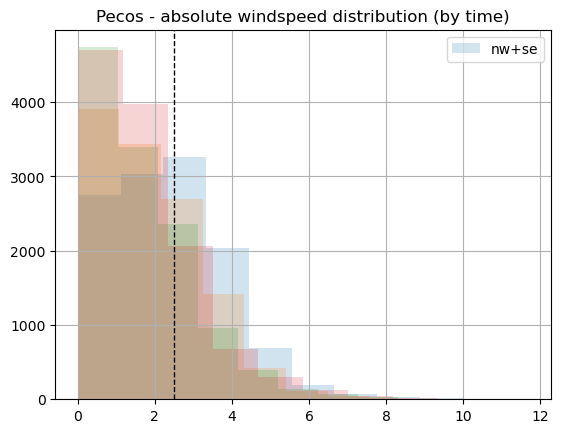

In [202]:
# check time windspeed

raw.groupby('time_format')['abs_we_speed'].hist(alpha=0.2)

plt.legend(['nw+se'])
plt.axvline(raw['abs_speed'].median(), color='k', linestyle='dashed', linewidth=1)
plt.title('Pecos - absolute windspeed distribution (by time)')
plt.show()

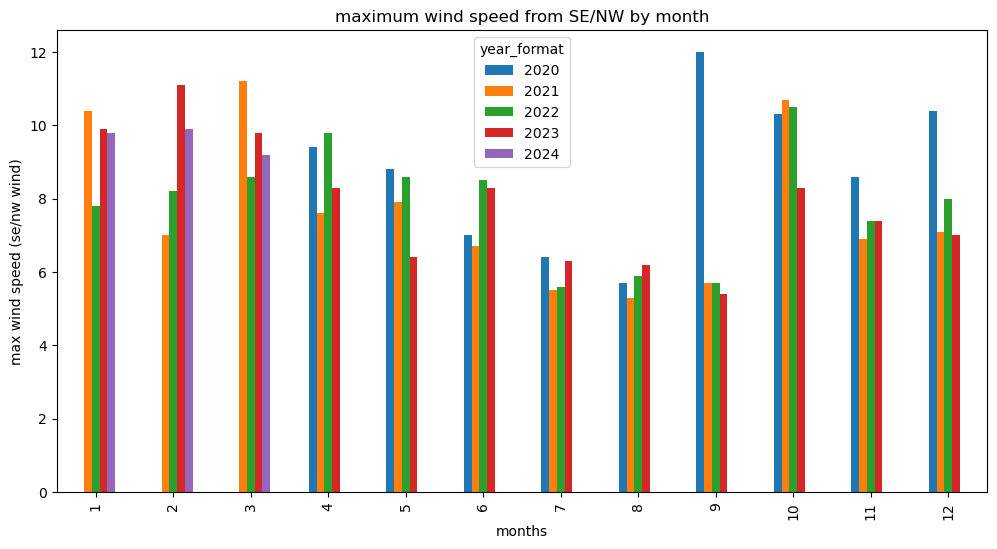

In [232]:
# check month max speed
raw_pivot = pd.pivot_table(
    raw[(raw['direction']=='se')|(raw['direction']=='nw')],
    values='abs_speed',
    index='month_format',
    columns='year_format',
    aggfunc='max'
)

ax = raw_pivot.plot(kind='bar')
fig = ax.get_figure()
fig.set_size_inches(12,6)
ax.set_xlabel('months')
ax.set_ylabel('max wind speed (se/nw wind)')
ax.set_title('maximum wind speed from SE/NW by month')

plt.show()

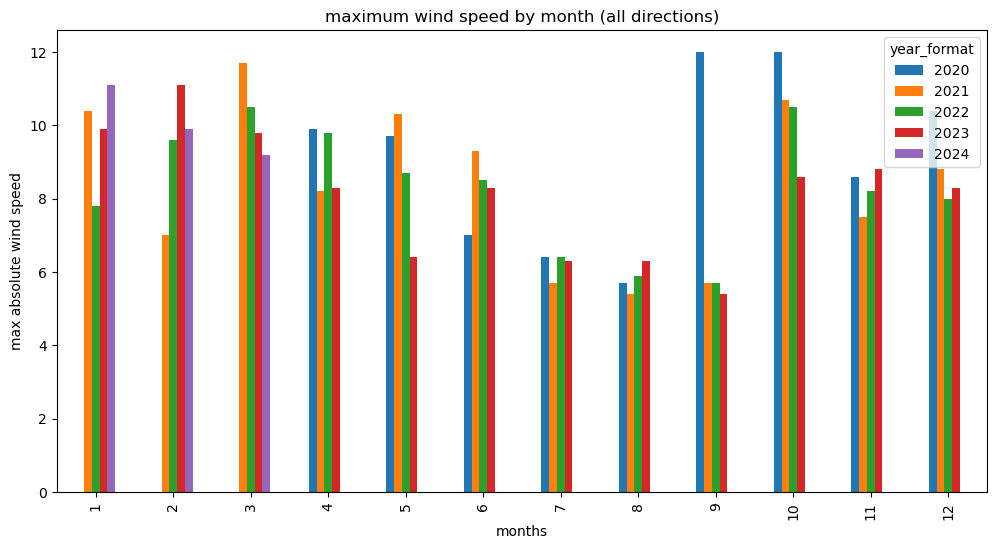

In [233]:
# check month max speed
raw_pivot = pd.pivot_table(
    raw,
    values='abs_speed',
    index='month_format',
    columns='year_format',
    aggfunc='max'
)

ax = raw_pivot.plot(kind='bar')
fig = ax.get_figure()
fig.set_size_inches(12,6)
ax.set_xlabel('months')
ax.set_ylabel('max absolute wind speed')
ax.set_title('maximum wind speed by month (all directions)')

plt.show()

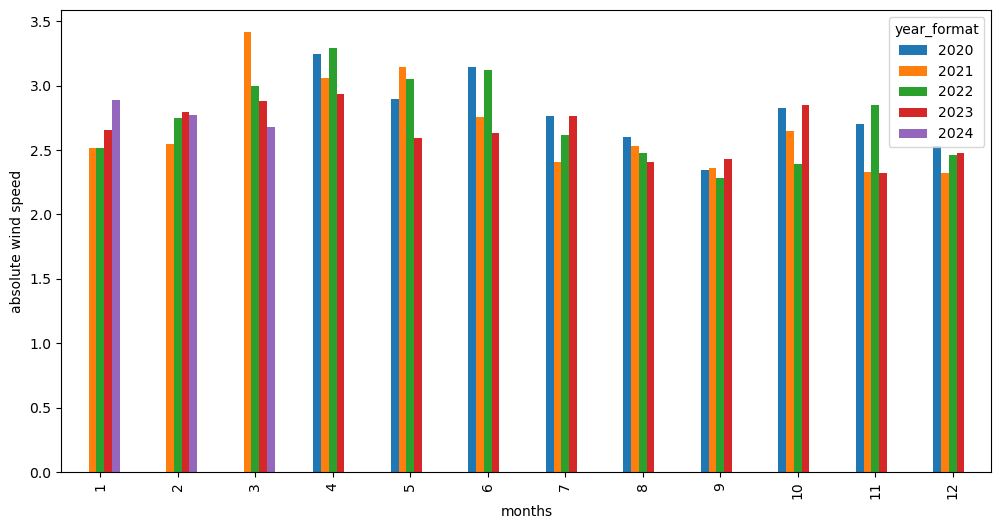

In [219]:
# check month mean speed
raw_pivot = pd.pivot_table(
    raw,
    values='abs_speed',
    index='month_format',
    columns='year_format',
    aggfunc='mean'
)

ax = raw_pivot.plot(kind='bar')
fig = ax.get_figure()
fig.set_size_inches(12,6)
ax.set_xlabel('months')
ax.set_ylabel('absolute wind speed')

plt.show()

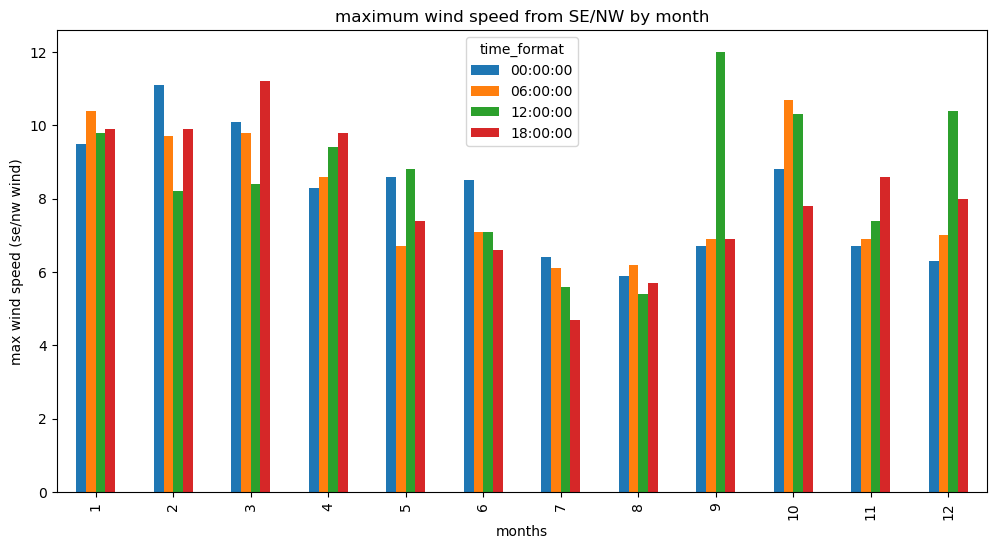

In [234]:
# testing

raw_pivot = pd.pivot_table(
    raw[(raw['direction']=='se')|(raw['direction']=='nw')],
    values='abs_speed',
    index='month_format',
    columns='time_format',
    aggfunc='max'
)

ax = raw_pivot.plot(kind='bar')
fig = ax.get_figure()
fig.set_size_inches(12,6)
ax.set_xlabel('months')
ax.set_ylabel('max wind speed (se/nw wind)')
ax.set_title('maximum wind speed from SE/NW by month')

plt.show()

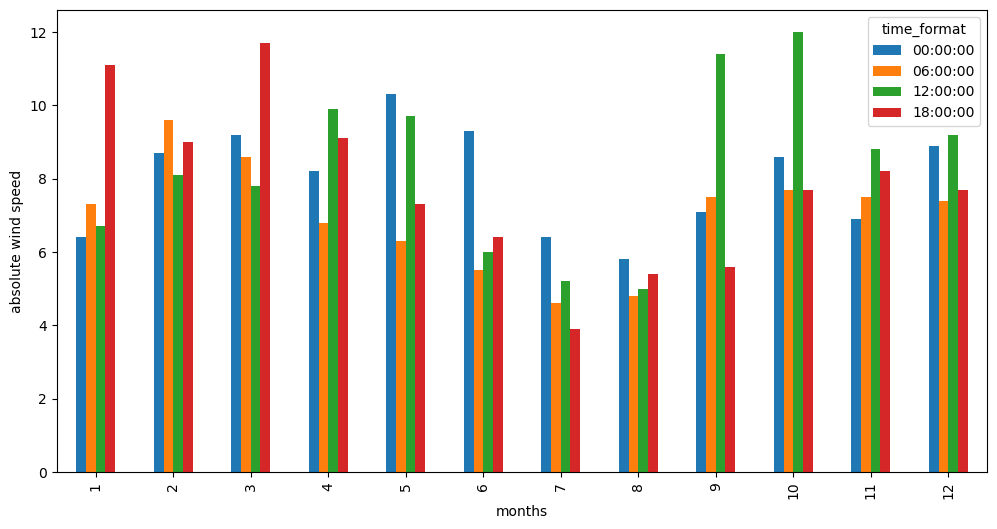

In [238]:
# check month mean speed
raw_pivot = pd.pivot_table(
    raw[(raw['direction']=='sw')|(raw['direction']=='ne')],
    values='abs_speed',
    index='month_format',
    columns='time_format',
    aggfunc='max'
)

ax = raw_pivot.plot(kind='bar')
fig = ax.get_figure()
fig.set_size_inches(12,6)
ax.set_xlabel('months')
ax.set_ylabel('absolute wind speed')

plt.show()